In [94]:
import pandas as pd

In [109]:
df_sets_brickset = pd.read_csv('sets-brickset.csv')

# change number to bricklink format
df_sets_brickset['Number'] = [
    f'{number}-{variant}' for number, variant 
    in zip(df_sets_brickset['Number'], df_sets_brickset['Variant'])
]

# change column names, filter columns
df_sets_brickset = df_sets_brickset.rename(
    columns={col: col.lower() for col in list(df_sets_brickset)}
)[['number', 'theme', 'year', 'name', 'minifigs', 'pieces', 'usprice']]

# make NaN minifigs 0.0
df_sets_brickset = df_sets_brickset.fillna(value={'minifigs': 0.0})

# set types
df_sets_brickset = df_sets_brickset.astype({
    'number': 'str',
    'year': 'str'
})

df_sets_brickset

,number,theme,year,name,minifigs,pieces,usprice
0,497-1,Space,1979,Galaxy Explorer,4.0,338.0,32.0
1,1072-1,Dacta,1979,Supplementary LEGO Set,0.0,304.0,16.3
2,1083-2,Dacta,1979,50 x 50 LEGO Gray Baseplate,0.0,1.0,10.0
3,1091-1,Dacta,1979,Lego Educational Storage Cloth,0.0,1.0,10.0
4,454-1,Space,1979,Two Lunar Landing Plates,0.0,2.0,5.0
...,...,...,...,...,...,...,...
14747,ST-1,Stranger Things,2019,Castle Byers,0.0,48.0,NaN
14748,STORMBREAKER-1,Marvel Super Heroes,2019,Stormbreaker,0.0,27.0,NaN
14749,TANTIVEIV-1,Star Wars,2019,Tantive IV,0.0,NaN,NaN
14750,TITW-1,Promotional,2019,Tree in the Woods,0.0,53.0,NaN


In [110]:
df_sets_bricklink = pd.read_csv('sets-bricklink.tsv', sep='\t')

# rename and filter columns
df_sets_bricklink = df_sets_bricklink.rename(
    columns={
        'Number': 'number',
        'Weight (in Grams)': 'set_weight',
    }
)[['number', 'set_weight']]

# filter out sets without weight data
df_sets_bricklink = df_sets_bricklink[df_sets_bricklink['set_weight'] != '?']

# set types
df_sets_bricklink = df_sets_bricklink.astype({
    'number': 'str',
    'set_weight': 'float'
})

df_sets_bricklink

,number,set_weight
8,041-2,569.0
11,101-1,74.0
15,1029-1,142.0
17,1030-1,1189.0
18,1031-1,277.0
...,...,...
15568,75964-21,13.0
15569,75964-22,7.0
15570,75964-23,12.0
15571,75964-24,5.0


In [111]:
df_boxes = pd.read_csv('boxes-bricklink.tsv', sep='\t')

# rename and filter columns
df_boxes = df_boxes.rename(
    columns={
        'Number': 'number',
        'Weight (in Grams)': 'box_weight'
    }
)[['number', 'box_weight']]

# filter out sets without weight data
df_boxes = df_boxes[df_boxes['box_weight'] != '?']

# set types
df_boxes = df_boxes.astype({
    'number': 'str',
    'box_weight': 'float'
})

df_boxes

,number,box_weight
3,367-1,134.00
5,2164-1,0.45
8,217-2,41.00
9,603-2,3.00
11,293-1,30.00
...,...,...
15420,911951-1,1.50
15422,BIL01-1,14.00
15441,11920-1,2.00
15442,111903-2,1.50


In [112]:
df_instructions = pd.read_csv('instructions-bricklink.tsv', sep='\t')

# rename and filter columns
df_instructions = df_instructions.rename(
    columns={
        'Number': 'number',
        'Weight (in Grams)': 'instruction_weight'
    }
)[['number', 'instruction_weight']]

# filter out instructions without weight
df_instructions = df_instructions[df_instructions['instruction_weight'] != '?']

# set types
df_instructions = df_instructions.astype({
    'number': 'str',
    'instruction_weight': 'float'
})

df_instructions

,number,instruction_weight
0,8470-1,102.00
2,691-1,3.40
3,367-1,20.00
8,293-1,3.40
9,645-2,3.40
...,...,...
9231,col19-14,2.38
9232,col19-15,2.38
9233,col19-16,2.38
9235,GA11NoDk-99,9.00


In [187]:
df_sets_inventory = pd.read_csv('sets-bricklink-inventory-derived.csv')
df_sets_inventory['parts_weight_inv'] = df_sets_inventory['parts_weight']

In [114]:
# make a dictionary to compute inflation-adjusted prices

df_inflation = pd.read_csv('inflation.csv')
dollar_2019 = df_inflation['amount'].tolist()[-1]
dict_inflation = {
    str(year): dollar_2019 / amount for year, amount in zip(df_inflation['year'], df_inflation['amount'])
}

dict_inflation

{'1979': 3.5338567493112953,
 '1980': 3.113567961165048,
 '1981': 2.8224202420242026,
 '1982': 2.658632124352332,
 '1983': 2.5758835341365462,
 '1984': 2.469278152069298,
 '1985': 2.384368029739777,
 '1986': 2.340857664233577,
 '1987': 2.2584330985915497,
 '1988': 2.1687066779374473,
 '1989': 2.069016129032258,
 '1990': 1.9629533282325937,
 '1991': 1.8836857562408222,
 '1992': 1.8286386315039205,
 '1993': 1.7754878892733565,
 '1994': 1.731160593792173,
 '1995': 1.683451443569554,
 '1996': 1.63516889738687,
 '1997': 1.598492211838006,
 '1998': 1.5739754601226996,
 '1999': 1.539963985594238,
 '2000': 1.4898838559814174,
 '2001': 1.4486617730095992,
 '2002': 1.4261145080600333,
 '2003': 1.3943369565217392,
 '2004': 1.3581683430386449,
 '2005': 1.3136610343061954,
 '2006': 1.272609126984127,
 '2007': 1.2373662837244745,
 '2008': 1.1916136793263448,
 '2009': 1.195868311759743,
 '2010': 1.176569321642147,
 '2011': 1.1405669981639468,
 '2012': 1.1174420934344977,
 '2013': 1.1013105422889202,


In [250]:
# join it all together!
df_merged = (
    df_sets_brickset
        .merge(df_sets_bricklink, how='left', on='number')
        .merge(df_boxes, how='left', on='number')
        .merge(df_instructions, how='left', on='number')
        .merge(df_sets_inventory, how='left', on='number')
)

# filter out sets with NaN prices, missing weights
df_merged = df_merged.dropna()

# add inflation-adjusted price
df_merged['adjusted_price'] = [
    price * dict_inflation[year] for price, year in zip(df_merged['usprice'], df_merged['year'])
]

# filter out sets with fewer than 25 pieces
df_merged = df_merged[df_merged['pieces'] > 25]

# filter out sets with more than 5% missing parts
df_merged = df_merged[df_merged['pct_missing_parts'] < 0.05]

# remove sets with price less than 1 dollar
df_merged[df_merged['adjusted_price'] >= 1.0]

# remove weird themes
excluded_themes=[
    'Clickits'
    'Dimensions',
    'Duplo',
    'Education',
    'Mindstorms',
    'Quatro',
]
df_merged = df_merged[~df_merged['theme'].isin(excluded_themes)]

# remove recent sets with incorrect minifig counts
excluded_numbers=[
    '75252-1',
    '71044-1',
    '75936-1',
    '70425-1',
    '10267-1',
    '76122-1',
    '21155-1',
]
df_merged = df_merged[~df_merged['number'].isin(excluded_numbers)]

# add basic estimate of parts weight
df_merged['parts_weight_est'] = df_merged['set_weight'] - (df_merged['box_weight'] + df_merged['instruction_weight'])

df_merged = df_merged.reset_index(drop=True)
df_merged

,number,theme,year,name,minifigs,pieces,usprice,set_weight,box_weight,instruction_weight,num_part_types,num_parts,parts_weight,num_missing_parts,pct_missing_parts,parts_weight_inv,adjusted_price,parts_weight_est
0,8858-2,Technic,1980,Auto Engines,0.0,460.0,69.00,513.0,133.00,100.0,47.0,248.0,215.29,0.0,0.000000,215.29,214.836189,280.00
1,744-1,Basic,1980,"Universal Building Set with Motor, 7+",0.0,537.0,59.00,1338.0,316.00,90.0,129.0,568.0,1234.91,3.0,0.005282,1234.91,183.700510,932.00
2,6970-1,Space,1980,Beta I Command Base,4.0,264.0,37.00,1030.0,360.00,34.0,102.0,260.0,594.78,4.0,0.015385,594.78,115.202015,636.00
3,722-1,Basic,1980,"Universal Building Set, 7+",0.0,301.0,20.00,741.0,182.00,52.0,101.0,316.0,410.12,0.0,0.000000,410.12,62.271359,507.00
4,5233-1,Homemaker,1980,Bedroom,1.0,26.0,4.50,406.0,144.24,6.0,63.0,160.0,334.43,1.0,0.006250,334.43,14.011056,255.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,41356-1,Friends,2019,Stephanie's Heart Box,1.0,85.0,7.99,129.0,44.00,16.0,40.0,89.0,63.90,1.0,0.011236,63.90,7.990000,69.00
3319,41357-1,Friends,2019,Olivia's Heart Box,2.0,85.0,7.99,129.0,36.00,17.0,39.0,85.0,63.24,2.0,0.023529,63.24,7.990000,76.00
3320,41358-1,Friends,2019,Mia's Heart Box,1.0,83.0,7.99,117.0,39.00,16.0,42.0,88.0,64.87,1.0,0.011364,64.87,7.990000,62.00
3321,41384-1,Friends,2019,Andrea's Summer Heart Box,1.0,83.0,7.99,129.0,46.00,16.0,51.0,88.0,64.36,1.0,0.011364,64.36,7.990000,67.00


In [251]:
# take a peek at what we're working with
display(df_merged[df_merged['year'] == '2019'])

,number,theme,year,name,minifigs,pieces,usprice,set_weight,box_weight,instruction_weight,num_part_types,num_parts,parts_weight,num_missing_parts,pct_missing_parts,parts_weight_inv,adjusted_price,parts_weight_est
3152,70840-1,The Lego Movie 2: The Second Part,2019,Welcome to Apocalypseburg!,13.0,3178.0,299.99,5329.0,633.00,867.0,722.0,3201.0,3560.174,13.0,0.004061,3560.174,299.99,3829.00
3153,10264-1,Creator Expert,2019,Corner Garage,6.0,2569.0,199.99,3035.0,466.00,406.0,629.0,2639.0,2160.680,6.0,0.002274,2160.680,199.99,2163.00
3154,75810-1,Stranger Things,2019,The Upside Down,8.0,2287.0,199.99,3323.0,732.00,544.0,581.0,2343.0,1998.899,8.0,0.003414,1998.899,199.99,2047.00
3155,10265-1,Creator Expert,2019,Ford Mustang,0.0,1471.0,149.99,1820.0,319.00,426.0,394.0,1521.0,1171.607,0.0,0.000000,1171.607,149.99,1075.00
3156,42096-1,Technic,2019,Porsche 911 RSR,0.0,1580.0,149.99,2270.0,292.00,579.0,197.0,1609.0,1546.400,4.0,0.002486,1546.400,149.99,1399.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,41356-1,Friends,2019,Stephanie's Heart Box,1.0,85.0,7.99,129.0,44.00,16.0,40.0,89.0,63.900,1.0,0.011236,63.900,7.99,69.00
3319,41357-1,Friends,2019,Olivia's Heart Box,2.0,85.0,7.99,129.0,36.00,17.0,39.0,85.0,63.240,2.0,0.023529,63.240,7.99,76.00
3320,41358-1,Friends,2019,Mia's Heart Box,1.0,83.0,7.99,117.0,39.00,16.0,42.0,88.0,64.870,1.0,0.011364,64.870,7.99,62.00
3321,41384-1,Friends,2019,Andrea's Summer Heart Box,1.0,83.0,7.99,129.0,46.00,16.0,51.0,88.0,64.360,1.0,0.011364,64.360,7.99,67.00


In [252]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [291]:
def process_set_data(
    df_sets, features, target, start_year='1979', end_year='2020'
):

    df = df_sets.copy()

    # deal with theme if included in model
    if 'theme' in features:
        # remove themes with fewer than 2 sets
        theme_counts = df.groupby('theme').count()
        small_themes = list(theme_counts[theme_counts['number'] < 2].index)
        df = df[~df['theme'].isin(small_themes)]

        # one-hot encode theme
        col_theme = df['theme']
        df = pd.get_dummies(df, columns=['theme'])
        df['theme'] = col_theme
        
        # include one-hot columns in model
        model_features = [f for f in features if f != 'theme'] + [
            f for f in list(df) if 'theme_' in f 
        ]
    else:
        model_features = features
    
    df = df.reset_index(drop=True)
    
    return df, model_features



def train_test_split_(df_sets, target):
    df = df_sets.copy()
    
    if 'theme' in list(df_sets):
        stratify = df['theme']
    else:
        stratify = None
    
    df_X = df[[f for f in list(df) if f != target]]
    df_y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        df_X, df_y, train_size=0.8, stratify=None
    )
    
    return X_train, X_test, y_train, y_test

In [292]:
df_adj = df_merged.copy()

# filter years on stategic realignment
start_year = '2005'
end_year = '2020'
df_adj = df_adj[
    (df_adj['year'] <= end_year) &
    (df_adj['year'] >= start_year)
]


target = 'adjusted_price'

# only use sets since strategic re-alignment (2005)
# excluding sets because their minifig counts are wrong
df_processed, features = process_set_data(
    df_sets=df_adj,
    features=[
        'theme',
        'minifigs',
        'parts_weight_inv',
        'parts_weight_est',
        'pieces',
    ],
    target=target,
)

X_train, X_test, y_train, y_test = train_test_split_(df_processed, target)

In [293]:
from sklearn.model_selection import KFold

def k_fold_models(df, target, n_splits=10):
    df_X = df[[f for f in list(df) if f != target]]
    df_y = df[target]

    kf = KFold(n_splits=n_splits)
    for train_index, test_index in kf.split(df_X):
        X_train, X_test = df_X.iloc[train_index], df_X.iloc[test_index]
        y_train, y_test = df_y.iloc[train_index], df_y.iloc[test_index]
        
        model = GradientBoostingRegressor(n_estimators=1000)
        model.fit(X_train[features], y_train)

k_fold_models(df_processed, target)

[ 260  261  262 ... 2597 2598 2599] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

In [270]:
# train model
model = GradientBoostingRegressor(n_estimators=1000)
model.fit(X_train[features], y_train)

imps = model.feature_importances_

print('\nFeature importances:')
display(sorted(list(zip(features, imps.tolist())), key=lambda elem: elem[1], reverse=True))


Feature importances:


[('parts_weight_est', 0.6778685423532298),
 ('parts_weight_inv', 0.1690441811067753),
 ('pieces', 0.1316605219809961),
 ('theme_Star Wars', 0.008156150052492915),
 ('minifigs', 0.0045753032631996576),
 ('theme_Architecture', 0.0012035538802792505),
 ('theme_Creator', 0.0009174044038271464),
 ('theme_Dimensions', 0.0008603942833795054),
 ('theme_Make and Create', 0.0006319939751501363),
 ('theme_Exo-Force', 0.000553097666359357),
 ('theme_Technic', 0.0004620426579658966),
 ('theme_Classic', 0.0004052437324536079),
 ('theme_Bricks and More', 0.0003460620079883364),
 ('theme_Creator Expert', 0.00024699085066207555),
 ('theme_Ninjago', 0.00021888557302087358),
 ('theme_Racers', 0.00021284481077519146),
 ('theme_Ideas', 0.00018096699561208032),
 ('theme_Indiana Jones', 0.00015700465698408294),
 ('theme_City', 0.00014876804095999556),
 ('theme_Batman', 0.00013529005617567884),
 ('theme_DC Comics Super Heroes', 0.00013426068168835039),
 ('theme_The LEGO Movie', 0.00013194072326904824),
 ('the

In [277]:
# evaluate the model

y_pred = model.predict(X_test[features])

print(f'R-squared train {model.score(X_train[features], y_train)}')
print(f'R-squared test {model.score(X_test[features], y_test)}')

df_test = X_test.copy()

# re-adjust price for inflation
df_test['prediction'] = [
    round(float(price) / dict_inflation[year], 2)
    for price, year in zip(y_pred, df_test['year'])
]
df_test['price'] = [
    float(price) / dict_inflation[year]
    for price, year in zip(y_test, df_test['year'])
]
df_test['raw_deviation'] = df_test['prediction'] - df_test['price']

print('\nMedian absolute deviation: $', round(df_test['raw_deviation'].abs().median(), 2))

with pd.option_context('display.max_rows', None):
    display(df_test[[
        'name',
        'theme',
        'year',
        'price',
        'prediction',
        'raw_deviation',
        'minifigs',
        'pieces',
        'parts_weight_est'
    ]][:50])

R-squared train 0.9969990148742169
R-squared test 0.940227146893361

Median absolute deviation: $ 2.02


,name,theme,year,price,prediction,raw_deviation,minifigs,pieces,parts_weight_est
2529,Drag Racer,Technic,2016,79.99,63.16,-16.83,0.0,647.0,607.00
1287,Clone Turbo Tank,Star Wars,2010,119.99,113.77,-6.22,6.0,1141.0,1234.80
1545,Ocean Speeder,Atlantis,2011,4.99,6.45,1.46,1.0,54.0,35.96
1461,Rockefeller Center,Architecture,2011,39.99,27.70,-12.29,0.0,240.0,164.00
2446,Stephanie's Pizzeria,Friends,2015,9.99,9.64,-0.35,1.0,87.0,72.00
1626,Spinner Battle Arena,Ninjago,2012,39.99,44.57,4.58,2.0,418.0,412.00
1074,Excavator,Technic,2008,59.99,59.68,-0.31,0.0,720.0,619.20
2032,Batman: Defend the Batcave,Juniors,2014,29.99,26.93,-3.06,3.0,150.0,288.30
799,Police Car,City,2005,5.99,7.33,1.34,1.0,59.0,62.00
2431,Eris Fun Pack,Dimensions,2015,11.99,13.10,1.11,1.0,59.0,36.00


In [276]:
# estimate the price of the new star destroyer

set_features={
    'minifigs': 2.0,
    'parts_weight_inv': 6800.0,
    'parts_weight_est': 6800.0,
    'num_parts': 4784.0,
    'theme': 'Star Wars'
}

def estimate_price(model, model_features, set_features):
    if 'theme' in set_features:
        set_features['theme_' + set_features['theme']] = 1
    features = {f: [set_features[f]] if f in set_features else [0] for f in model_features}
    df = pd.DataFrame(features)
    return model.predict(df[model_features])

estimate_price(model, features, set_features)

array([481.81325653])

let's do some plots!

In [265]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

def scatter_plot(
    x, 
    y,
    title='',
    x_label='', 
    y_label='',
    callout_x=None,
    callout_y=None
):
    plt.scatter(
        x,
        y, 
        s=10,
        alpha=0.3,
    )
    if callout_x is not None and callout_y is not None:
        plt.scatter(
            callout_x,
            callout_y, 
            s=15,
            alpha=0.8,
            color='red'
        )
    plt.plot(
        np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
        alpha=0.5,
        color='green',
    )
    plt.ylim(ymin=0)
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(axis='both', alpha=0.3)
    plt.show()

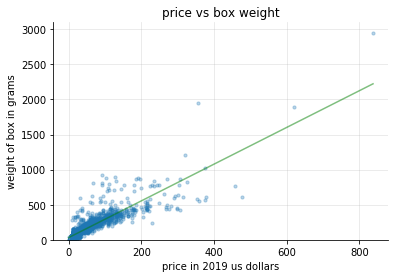

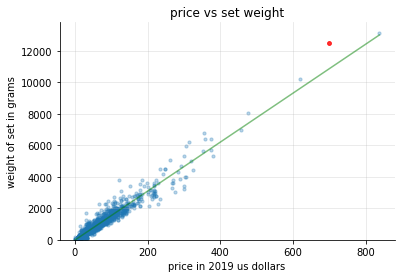

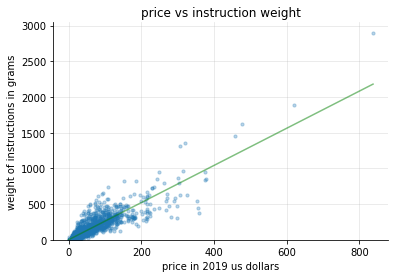

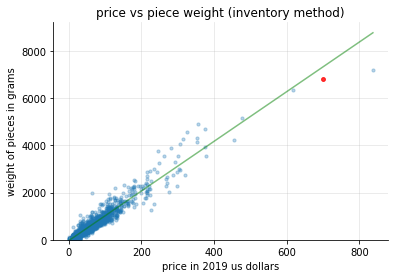

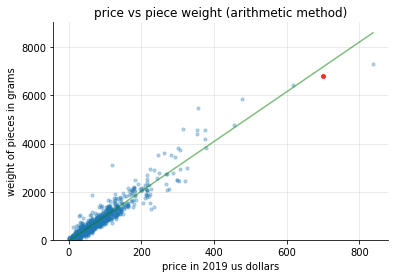

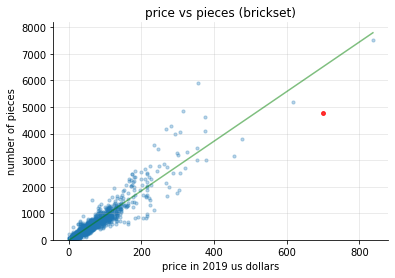

In [279]:
df = df_adj.copy()

scatter_plot(
    df['adjusted_price'],
    df['box_weight'],
    'price vs box weight',
    'price in 2019 us dollars',
    'weight of box in grams',
)

scatter_plot(
    df['adjusted_price'],
    df['set_weight'],
    'price vs set weight',
    'price in 2019 us dollars',
    'weight of set in grams',
    [699.99],
    [12500.0],
)

scatter_plot(
    df['adjusted_price'],
    df['instruction_weight'],
    'price vs instruction weight',
    'price in 2019 us dollars',
    'weight of instructions in grams',
)

scatter_plot(
    df['adjusted_price'],
    df['parts_weight_inv'],
    'price vs piece weight (inventory method)',
    'price in 2019 us dollars',
    'weight of pieces in grams',
    [699.99],
    [6800.0],
)

scatter_plot(
    df['adjusted_price'],
    df['parts_weight_est'],
    'price vs piece weight (arithmetic method)',
    'price in 2019 us dollars',
    'weight of pieces in grams',
    [699.99],
    [6800.0],
)

scatter_plot(
    df['adjusted_price'],
    df['pieces'],
    'price vs pieces (brickset)',
    'price in 2019 us dollars',
    'number of pieces',
    [699.99],
    [4782.0],
)

In [280]:
def year_plot(df, col, title='', y_label=''):
    plt.plot(
        df.index,
        df[col],
    )
    plt.ylim(ymin=0)
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.title(title)
    plt.ylabel(y_label)
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))
    plt.grid(axis='y', alpha=0.3)
    plt.show()

In [283]:
df_ratios = df_merged.copy()
df_ratios['piece_weight_to_price'] = df_ratios['adjusted_price'] / df_ratios['parts_weight_est']
df_ratios['pieces_to_price'] = df_ratios['adjusted_price'] / df_ratios['pieces']
df_ratios['average_piece_weight'] = df_ratios['parts_weight_est'] / df_ratios['pieces']
df_ratios['year'] = df_ratios['year'].astype(int)

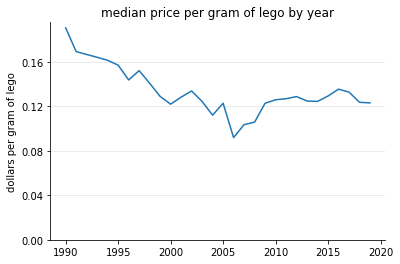

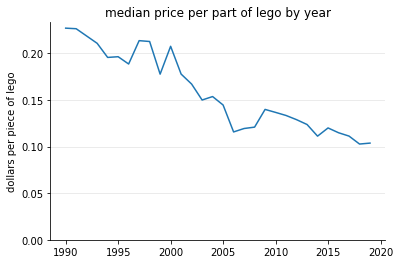

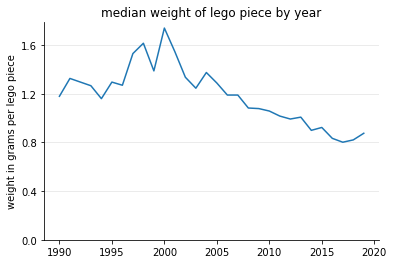

In [284]:
df_year = df_ratios.groupby('year')[[
    'piece_weight_to_price', 'pieces_to_price', 'pieces', 'parts_weight_est', 'adjusted_price', 'average_piece_weight'
]].median()

df_year = df_year[df_year.index >= 1990]
year_plot(
    df_year, 
    'piece_weight_to_price',
    'median price per gram of lego by year',
    'dollars per gram of lego'
)
year_plot(
    df_year,
    'pieces_to_price',
    'median price per part of lego by year',
    'dollars per piece of lego'
)
# year_plot(
#     df_year, 
#     'pieces'
# )
# year_plot(
#     df_year, 
#     'piece_weight'
# )
# year_plot(
#     df_year, 
#     'adjusted_price'
# )
year_plot(
    df_year, 
    'average_piece_weight',
    'median weight of lego piece by year',
    'weight in grams per lego piece'
)

how did we get here?

- stud muffin bricks on instagram
- http://anjsbrickblog.blogspot.com/2018/12/lego-star-wars-2019-ucs-set-details.html
- https://www.reddit.com/r/lego/comments/ae00sb/2019_d2c_set_list_posted_on_eurobricks/
- https://www.eurobricks.com/forum/index.php?/forums/topic/120925-fairground-sets-rumours-and-discussion/&page=20
- https://www.eurobricks.com/forum/index.php?/forums/topic/167577-lego-star-wars-2019-set-discussion-read-first-post/&page=52


appendix 1: merge brickset year csvs (not necessary to run analysis)

In [37]:
import os

brickset_path = 'sets-brickset'
list_dfs_brickset = []

for filename in os.listdir(brickset_path):
    list_dfs_brickset.append(
        pd.read_csv(os.path.join(brickset_path, filename))
    )

df_sets_brickset = pd.concat(list_dfs_brickset, ignore_index=True)

In [32]:
df_sets_brickset.to_csv('sets-brickset.csv', index=False)

appendix 2: getting the set weight (not necessary to run analysis)

In [27]:
# make a dict of part weights
df_part_weights = pd.read_csv('parts-bricklink.tsv', sep='\t')
dict_part_weights = {
    number: float(weight) for number, weight in zip(
        df_part_weights['Number'].tolist(),
        df_part_weights['Weight (in Grams)'].tolist()
    ) if weight != '?'
}

In [28]:
# get isd weight
df_isd_parts = pd.read_csv('set-inventories/75252-1.tsv', sep='\t')
df_isd_parts['part_weight'] = [
    dict_part_weights[x] if x in dict_part_weights else 0.0 for x in df_isd_parts['Type'].tolist()
]
sum(df_isd_parts['Item Name'] * df_isd_parts['part_weight'])

6781.290999999996

In [29]:
# validate this works with a known set
df_mf_parts = pd.read_csv('set-inventories/75192-1.tsv', sep='\t')
df_mf_parts['part_weight'] = [
    dict_part_weights[x] if x in dict_part_weights else 0.0 for x in df_mf_parts['Type'].tolist()
]
sum(df_mf_parts['Item Name'] * df_mf_parts['part_weight'])

7210.767999999998

appendix 3: computing inventory-derived attributes for all sets (not necessary to run analysis)

In [86]:
# computing additional set-level attributes

import os

sync_directory = 'set-inventories'
synced_sets = {s.split(".")[0] for s in os.listdir(sync_directory)}

In [89]:
def get_set_attributes(set_number):
    df = pd.read_csv(f'set-inventories/{set_number}.tsv', sep='\t', encoding='utf-8', index_col=False)
    df['Item No'] = df['Item No'].astype(str)
    num_part_types = len(df)
    num_parts = df['Qty'].sum()
    parts_weight = sum([ 
        dict_part_weights[part] * float(qty) if part in dict_part_weights else 0.0
        for part, qty in zip(df['Item No'].tolist(), df['Qty'].tolist())
    ])
    num_missing_parts = sum([
        qty if (part not in dict_part_weights) and ('stk' not in part) else 0.0 
        for part, qty in zip(df['Item No'].tolist(), df['Qty'].tolist())
    ])
    pct_missing_parts = num_missing_parts / num_parts
    return {
        'number': set_number,
        'num_part_types': num_part_types,
        'num_parts': num_parts,
        'parts_weight': parts_weight,
        'num_missing_parts': num_missing_parts,
        'pct_missing_parts': pct_missing_parts,
    }

fails = 0
inventory_data = []
for s in synced_sets:
    try:
        inventory_data.append(get_set_attributes(s))
    except:
        fails += 1
        if fails % 100 == 0:
            print(f'{fails} loads failed')

print(f'failed on {fails} sets')

# I believe almost all load fails are from html error pages when a set is not found

100 loads failed
200 loads failed
300 loads failed
400 loads failed
500 loads failed
600 loads failed
700 loads failed
800 loads failed
900 loads failed
1000 loads failed
1100 loads failed
1200 loads failed
1300 loads failed
1400 loads failed
1500 loads failed
1600 loads failed
1700 loads failed
1800 loads failed
1900 loads failed
2000 loads failed
failed on 2065 sets


In [92]:
cols = [
    'number',
    'num_part_types',
    'num_parts',
    'parts_weight',
    'num_missing_parts',
    'pct_missing_parts'
]
dict_cols = {}

for c in cols:
    dict_cols[c] = [s[c] for s in inventory_data]

df_inv = pd.DataFrame(dict_cols)
df_inv.to_csv('sets-bricklink-inventory-derived.csv', index=False)